##Renegotiation paper visualization

**3D visualization of consumer optimum**

This code will draws contour surfaces and points representing the consumer's indifference surfaces and optimal choices.
The plot will be in a separate Mayavi visualizer window that can then be rotated and modified.

The [mayavi](http://docs.enthought.com/mayavi/mayavi/) module must be pre-installed and only runs in python 2.7

In [1]:
%reload_ext watermark
%watermark -u -n -t 

Last updated: Tue Jun 30 2015 23:08:21 


In [2]:
from __future__ import print_function
%matplotlib inline
import numpy as np
#import mayavi
import mayavi.mlab as mlab
from numpy import ogrid
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams["figure.figsize"] = (10, 8)
np.set_printoptions(precision=3)

All the machinery of solving for equilibrium contracts is in the python Contract module which includes class objects Contract, Monopoly and Competitive

In [3]:
import Contract

In [14]:
#Contract??   #  run this cell to see the code

Let's set an endowment and set things up to solve for equilibrium monopoly contracts

In [5]:
cM = Contract.Monopoly(beta = 0.75)
cM.y = [80, 160, 160]
cM.print_params()

beta    : 0.75
delta   : 1.0
guess   : [100 100 100]
kappa   : 0
r       : 0.0
rho     : 0.95
y       : [80, 160, 160]


In [6]:
yE=cM.y
cMF = cM.fcommit()         # the full commitment contract 
cMR = cM.reneg(cMF)        # what renegotiate to if full commitment unantipatedly undone     
cMRP = cM.reneg_proof().x
for ctr in ['yE', 'cMF', 'cMR', 'cMRP']:
    print("{:<4} : {}".format(ctr, eval(ctr)))

yE   : [80, 160, 160]
cMF  : [ 145.756  107.674  107.674]
cMR  : [ 145.756  122.527   90.514]
cMRP : [ 138.371  129.68    95.798]


Prepare the grid for plotting iso-utility surfaces

In [13]:
x0, x1, x2 = ogrid[1:200, 1:200, 1:200]

In [14]:
rho = cM.rho
beta = cM.beta
def u(c):
    return ((1/(1-rho))*c**(1-rho))

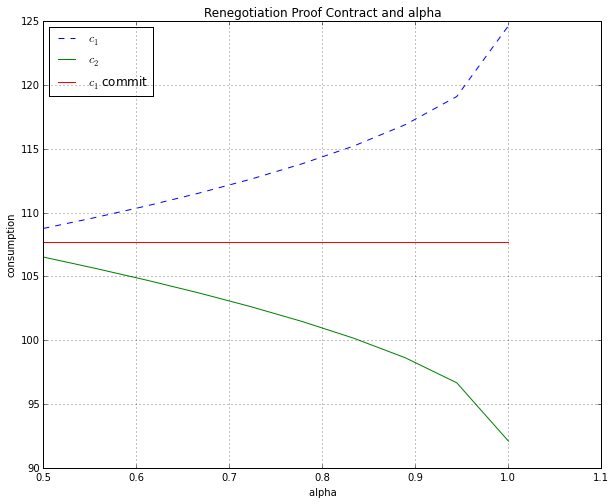

In [15]:
# Similar to above but solve for contract as a function of firm type ALPHA
cM.y     = yE                            
cMF      = cM.fcommit()
num_pts  = 10
alphs    = np.linspace(0.5,1.0,num_pts)       # iterate over different values of beta
C        = 4*(np.ones(num_pts) - alphs)     #  h(alpha)/alpha  or cost of renegotiaton
cMRP     = np.zeros((3,num_pts))          # matrix for (c0,c1,c2) at each kappa
profitRP = np.zeros(num_pts)
NprofitRP =np.zeros(num_pts)

for i in range(0,num_pts):
    cM.kappa = C[i]                 # change optimal contract
    cMRP[:,i] = cM.reneg_proof().x 
    cM.guess =  cMRP[:,i]                 # use this sol as guess for next optimum
    profitRP[i] = cM.profit(cMRP[:,i],yE)
    NprofitRP[i] = alphs[i]*cM.profit(cMRP[:,i],yE)

c0,c1,c2 = cMRP[0,:], cMRP[1,:],cMRP[2,:]                # save results for plotting

fig3 = plt.figure()  
plt.plot(alphs,c1,'--',label='$c_{1}$')
plt.plot(alphs,c2,label='$c_{2}$')
plt.plot(alphs,np.ones(num_pts)*cMF[1],label='$c_{1}$ commit')
plt.grid()
plt.title('Renegotiation Proof Contract and alpha' )
plt.xlabel('alpha ')
plt.ylabel('consumption')
plt.legend(loc='upper left')
plt.show()

Find the present expected utility value of the reservatin iso-utility surface  

In [16]:
# Contract??     # run this cell to see the code

In [17]:
PUy = cM.PVU(cMF,cM.beta)
yE, PUy

([80, 160, 160], 63.564971061793578)

In [18]:
cMF

array([ 145.756,  107.674,  107.674])

**Plot it in mayavi interactive ** -- this will open an external window.  
As long as that window is open we can't proceed to more code. So the window must be closed to do further code.
We'll take a snapshot for later inline display in this notebook

In [ ]:
ctr = mlab.contour3d(u(x0) + beta*(u(x1) + u(x2)),
                            contours=[PUy],transparent=True)

mlab.outline()

mlab.points3d(c0, c1, c2)
mlab.points3d(yE[0], yE[1], yE[2], mode="cube")
mlab.plot3d(c0, c1, c2, tube_radius=.1)

arr = mlab.screenshot()    # this saves an image that can be displayed later in the notebook
mlab.show()

Load the saved image

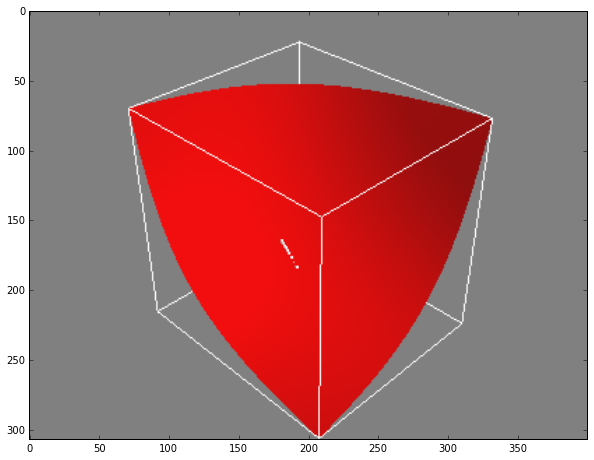

In [11]:
plt.imshow(arr)
plt.show()